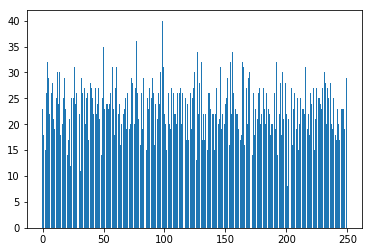

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

t1 = time.time()
# Generate initial distribution of labels
N_imgs = 10**3 # number of images
N_labels = 250 # number of different labels
all_labels = np.zeros((N_imgs, N_labels)) # perhaps uses too much memory?
mean_no_labels = 5 # becomes 1 larger below

for n in range(N_imgs):
    num_labels = np.random.poisson(mean_no_labels) + 1
    labels = np.random.randint(N_labels, size=num_labels)
    for j in range(N_labels):
        if j in labels:
            all_labels[n,j] = 1
    
# The initial, skewed distribution of labels that we want to even out
label_dist = np.sum(all_labels, axis=0) 
no_labels_init = np.sum(label_dist)
Z_init = np.sum(np.exp(-label_dist/no_labels_init))/N_labels
plt.bar(np.linspace(0,N_labels-1,N_labels),label_dist)
plt.show()

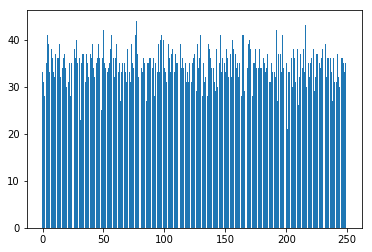

In [7]:
# Augment with images with depending on how frequent they are

ratio = 1.5 # ratio of the final and initial number of images 
N_imgs_max = N_imgs*ratio

while N_imgs < N_imgs_max:

    for k in range(N_imgs): # doesn't loop through the ones appended during the current loop
        # Check if we have enough images
        N_imgs_now = all_labels.shape[0]
        if N_imgs_now == N_imgs_max:
            break
        
        no_labels = np.sum(label_dist)
        Z = np.sum(np.exp(-label_dist/no_labels))/N_labels # "energy" of system before augmentation
        # Try augmentation
        all_labels_aug = np.append(all_labels, [all_labels[k]], axis=0) 
        label_dist_aug = np.sum(all_labels_aug, axis=0) 
        no_labels_aug = np.sum(label_dist_aug)
        Z_aug = np.exp(-label_dist_aug/no_labels_aug).sum()/N_labels # "energy" of system after augmentation
        # Apply change if "energy" is lowered
        if Z_aug < Z:
            all_labels = all_labels_aug
            label_dist = np.sum(all_labels, axis=0) # update the distribution of labels
        
        """ More "intuitive" way of doing it (with probabilities), but runs into numerical issues:
        lk = np.argwhere(all_labels[k] == 1).flatten() # labels of img. k
        Z_k = np.exp(-label_dist[lk]).sum() # label_dist[i] = n_i
        Z = np.exp(-label_dist).sum()
        p = 1-Z_k/Z # probability of augmentation
        r = np.random.uniform()
        if r < p: # criterion for augmentation
            all_labels = np.append(all_labels, [all_labels[k]], axis=0) # adds the represention of the new image in the labels
            label_dist = np.sum(all_labels, axis=0) # update the distribution of labels
        """
            
    N_imgs = all_labels.shape[0] # update how many images there are after the just finished round of augmentation

# The final, non-skewed distribution of labels
label_dist = np.sum(all_labels, axis=0) 
plt.bar(np.linspace(0,N_labels-1,N_labels),label_dist)
plt.show()

t2 = time.time()

In [8]:
print('Final no. images: ', N_imgs)
print('Inititial Z-value: ', Z_init)
print('Final Z-value: ', Z)
min_Z = np.exp(-1/N_labels) # for a completely even distribution
print('Smallest possible Z: ', min_Z)
print('Total runtime: ', t2-t1)

Final no. images:  1500
Inititial Z-value:  0.9960083372982592
Final Z-value:  0.9960080726137508
Smallest possible Z:  0.9960079893439915
Total runtime:  3.9010610580444336
